In [176]:
import sys
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/seqUtils/src/')
import time
from seqUtil import *
from bamUtil import *
from nanoUtil import *
from nntUtil import *
from modPredict import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
pos_bam = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/mapping/unique.500.pass.sorted.bam'
neg_bam = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/mapping/unique.0.pass.sorted.bam'
pos_evt = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/eventalign/unique.500.eventalign.tsv'
neg_evt = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/eventalign/unique.0.eventalign.tsv'
positions = randomPosition(n=2, genome = ref, windowSize=80)

In [159]:
neg_read = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/eventalign/PHO5_neg_95ee9f67-697d-470f-bad0-08cabf36d24e_chrII:429000-435000modelScores.tsv'
pos_read = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/eventalign/PHO5_pos_a5ec334f-09d4-428c-9bbb-326aed5f8279_chrII:429000-435000modelScores.tsv'

In [193]:
chrom_read1 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/eventalign/PHO5_chrom_0403112a-b3f1-410e-8365-7d3b7c27d625_chrII:429000-435000modelScores.tsv'
chrom_read2 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/eventalign/PHO5_chrom_2cea5b76-0076-44dc-8651-15b165506dca_chrII:429000-435000modelScores.tsv'

In [ ]:
ref = '/private/groups/brookslab/gabai/projects/Add-seq/data/ref/sacCer3.fa'

In [213]:
alignment = getAlignedReads(sam = pos_bam, region = 'chrII:429000-435000', genome=ref, print_name=False)

In [ ]:
sns.kdeplot(probs, fill=False, color=color, )

In [177]:
def plotDensity(model_score, color, label):
    probs = []
    with open(model_score, 'r') as scoreFh:
        for line in scoreFh:
            line = line.strip().split('\t')
            prob = float(line[1])
            probs.append(prob)
    sns.kdeplot(probs, fill=False, color=color, label = label)

In [237]:
def plotScore(model_score, color, label):
    probs = []
    with open(model_score, 'r') as scoreFh:
        for line in scoreFh:
            line = line.strip().split('\t')
            prob = float(line[1])
            probs.append(prob)
    print(len(probs))
    return(probs)
    x = np.arange(429000,  435000, 1, dtype = int)
    plt.plot(x,y, color=color, label = label)

In [240]:
scores = plotScore(chrom_read1, color = 'g', label = 'read1')
positions = list(np.arange(429000, 435000, 1, dtype = int))

6000


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticks'

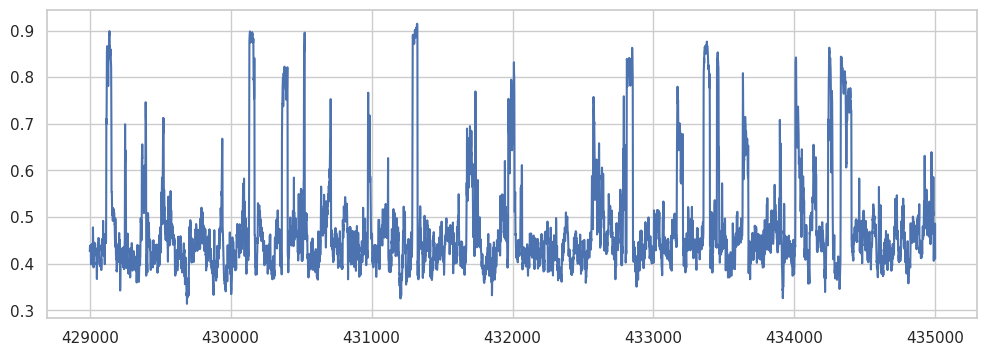

In [257]:
plt.figure(figsize=(12,4))
plot = plt.plot(positions, scores)
plot.set_xticks(np.arange(429000, 435000, 5))
plt.savefig('../results/figures/230925_PHO5_signals.pdf')

In [179]:
def plotPosBase(model_score, ctrl, good_score, bad_score, outpath = '', prefix = ''):
    good_freq, bad_freq, good_pos, bad_pos, good_pos_mean, bad_pos_mean = [], [], [], [], [], []
    
    print('parsing model score file...')
    probs = []
    with open(model_score, 'r') as scoreFh:
        for line in scoreFh:
            line = line.strip().split('\t')
            if len(line[0]) < 40:
                continue

            prob = float(line[1])
            basePos = line[3].split(',')
            probs.append(prob)
            if ctrl == 'pos':
                labels = ['good >' + str(good_score), 'bad <' + str(bad_score)]

                if prob < bad_score:
                    bad_freq.append(float(line[2]))
                    bad_pos.append(np.median([abs(40-int(i)) for i in basePos])) 
                    bad_pos_mean.append(np.mean([abs(40-int(i)) for i in basePos]))

                elif prob > good_score:
                    good_freq.append(float(line[2]))
                    good_pos.append(np.median([abs(40-int(i)) for i in basePos]))
                    good_pos_mean.append(np.mean([abs(40-int(i)) for i in basePos]))
            
            if ctrl == 'neg':
                labels = ['good <' + str(good_score), 'bad >' + str(bad_score)]

                if prob > bad_score:
                    bad_freq.append(float(line[2]))
                    bad_pos.append(np.median([abs(40-int(i)) for i in basePos])) 
                    bad_pos_mean.append(np.mean([abs(40-int(i)) for i in basePos]))

                elif prob < good_score:
                    good_freq.append(float(line[2]))
                    good_pos.append(np.median([abs(40-int(i)) for i in basePos]))
                    good_pos_mean.append(np.mean([abs(40-int(i)) for i in basePos]))
    
    print('Done parsing model score file!')
    
    print('plotting boxplots...')
    print(len(good_freq), len(bad_freq))
    data_left = [good_freq, bad_freq]
    data_middle = [good_pos, bad_pos]
    data_right = [good_pos_mean, bad_pos_mean]

    
    flierprops = dict(marker='o', markerfacecolor='w', markersize=3,
                      linestyle='none', markeredgecolor='black')

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    # rectangular box plot
    bplot1 = ax1.boxplot(data_left,
                         vert=True,
                         patch_artist=True,
                         labels=labels,
                        flierprops=flierprops)

    bplot2 = ax2.boxplot(data_middle,
                         vert=True,
                         patch_artist=True,
                         labels=labels,
                         flierprops=flierprops)

    bplot3 = ax3.boxplot(data_right,
                         vert=True,
                         patch_artist=True,
                         labels=labels,
                         flierprops=flierprops)

    ax1.set_title('A%')
    ax2.set_title('Deviation of A from center (median)')
    ax3.set_title('Deviation of A from center (mean)')

    colors = ['tab:purple', 'tab:red']
    for bplot in (bplot1, bplot2, bplot3):
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
    
    outf = outpath + prefix + '_' + ctrl + '_' + 'effectof_posMod_prediction.pdf'
    
    print('Saving plot to ', outf)
    fig.savefig(outf) 

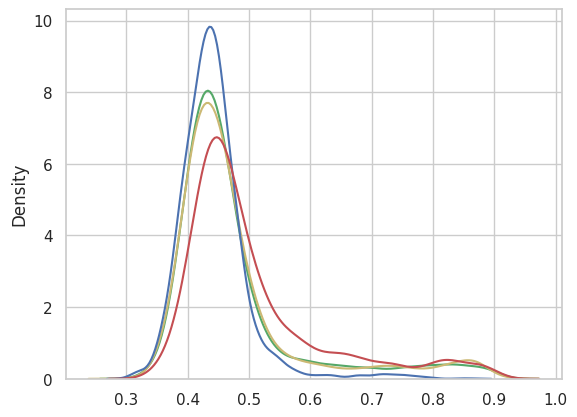

In [197]:
plotDensity(chrom_read1, color = 'g', label = 'read1')
plotDensity(chrom_read2, color = 'y', label = 'read2')
plotDensity(neg_read, color = 'b', label = 'neg')
plotDensity(pos_read, color = 'r', label = 'pos')

parsing model score file...
Done parsing model score file!
plotting boxplots...
393 3966
Saving plot to  ../results/figures/230919_pos_effectof_posMod_prediction.pdf


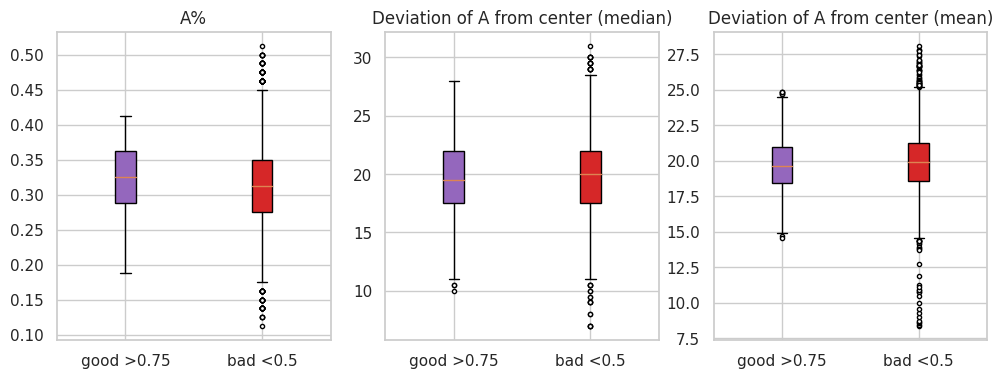

In [185]:
plotPosBase(model_score=pos_read, ctrl = 'pos', good_score = 0.75, bad_score = 0.5, 
            outpath = '../results/figures/', prefix = '230919')

parsing model score file...
Done parsing model score file!
plotting boxplots...
5455 86
Saving plot to  ../results/figures/230919_neg_effectof_posMod_prediction.pdf


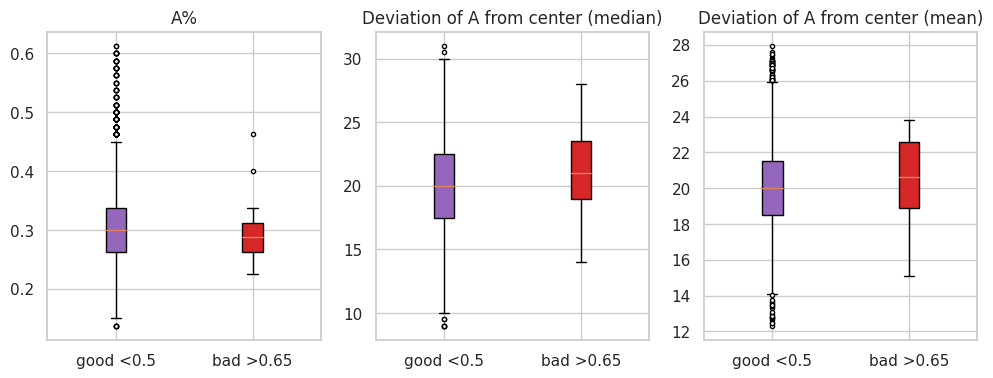

In [191]:
plotPosBase(model_score=neg_read, ctrl = 'neg', good_score = 0.5, bad_score = 0.65, 
            outpath = '../results/figures/', prefix = '230919')

In [13]:

c = 0
with open(pos_read, 'r') as posFh, open(neg_read,'r') as negFh:
    for lineP, lineN in zip(posFh, negFh):
        lineP = lineP.strip().split('\t')
        lineN = lineN.strip().split('\t')
        posProb = float(lineP[1])
        negProb = float(lineN[1])
        delta = posProb - negProb
        print(delta)

-0.13833776668266012
-0.09681741893291473
0.0005523512760798321
-0.05493660668532058
-0.04053353204538945
-0.0234001772744315
-0.058671983452434184
-0.06953273307193408
-0.10874868319793185
-0.2112695676202958
-0.4310331161205585
-0.45696287602186203
-0.436816743548761
-0.42383246521155044
-0.4188571287827058
-0.40343379016433445
-0.3754935772979961
-0.3536764793097973
-0.31256677883140965
-0.3262034141355091
-0.3044692096256075
-0.2883504971861839
-0.294784318123545
-0.23493219971656804
-0.13404584749072201
-0.12340821190313861
-0.10755905210971833
-0.1905577222506205
-0.22939584068223545
-0.27953284306633736
-0.28510366144933197
-0.2846690896484587
-0.32965450286865233
-0.31006190925836563
-0.3245338176687559
-0.3182422383265062
-0.3218577719397015
-0.30457975963751477
-0.28637560123183825
-0.2935105057863089
-0.24642883141835525
-0.0979806132176343
-0.1113113873025291
-0.44370916769618085
-0.3974274918437004
-0.18506580320271582
-0.049077320098877
-0.04756304944232426
-0.06457297007